The goal of this code is to take in images (of reduced resolution) and generate random patches of a specified dimension (ala point counting). The model will take in these images and generate classifications. 

In [2]:

import numpy as np
from matplotlib import pyplot as plt 
from PIL import image

ImportError: cannot import name 'image' from 'PIL' (/opt/conda/lib/python3.13/site-packages/PIL/__init__.py)

In [ ]:
#img = Image.open('image.jpg')
#resized_img = img.resize((2000,3000)) #can use to resize image to given specifications
#patches = patchify.patchify(np.asarray(resized_img), patch_size = (100,100, 3), step = 100)


In [3]:
# In numpy randomly
import numpy as np
from skimage import data
import matplotlib.pyplot as plt 
import math

def randomPatches(resized_img, patch_size, num_patches):
    collect = []
    for i in range(num_patches):
        img_to_arr = np.asarray(resized_img)
        x = np.random.randint(img_to_arr.shape[0]-patch_size)
        y = np.random.randint(img_to_arr.shape[1]-patch_size)
        random_patches = img_to_arr[x:x+patch_size, y:y + patch_size]
        collect.append(random_patches)
    return collect


(872, 1000, 3)


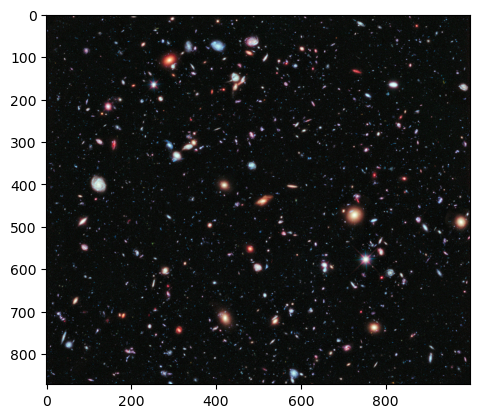

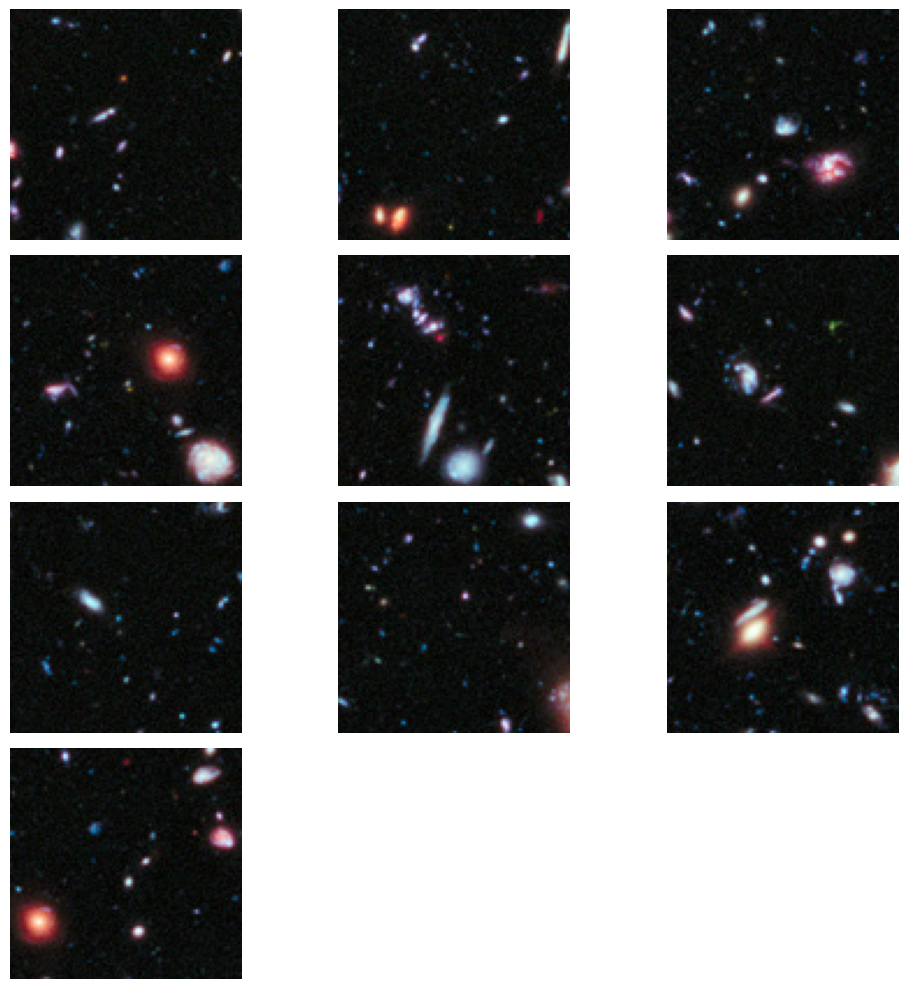

In [4]:
# Test on sklearn images
image = data.hubble_deep_field()
print(image.shape)
plt.imshow(image)

patches = randomPatches(image, 100, 10)

n = len(patches)
cols = int(math.sqrt(n))
rows = math.ceil(n/cols)
plt.figure(figsize = (10,10))
for i, patch in enumerate(patches):
    plt.subplot(rows, cols, i+1)
    plt.imshow(patch)
    plt.axis('off')
plt.tight_layout()
plt.show()

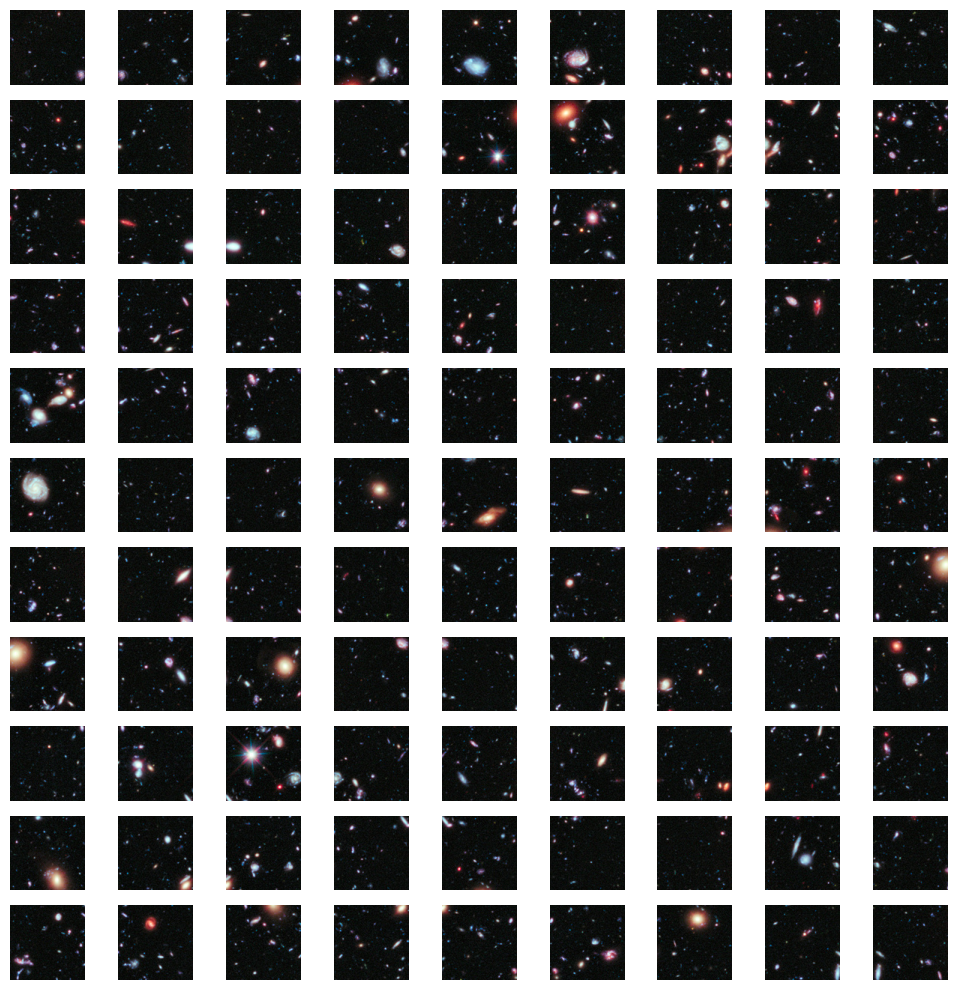

In [5]:
def patchGrid(resized_img, patch_size, overlap):
    step_size = patch_size - overlap
    height, width = resized_img.shape[:2]
    patches = []
    for y in range(0, height - patch_size + 1, step_size):
        for x in range(0, width - patch_size + 1, step_size):
            patch = resized_img[y:y+patch_size, x:x+patch_size]
            patches.append(patch)
    return patches

image = data.hubble_deep_field()

patches = patchGrid(image, 100, 10)

n = len(patches)
cols = int(math.sqrt(n))
rows = math.ceil(n/cols)
plt.figure(figsize = (10,10))
for i, patch in enumerate(patches):
    plt.subplot(rows, cols, i+1)
    plt.imshow(patch)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [7]:
import os
from skimage import io

input_folder = "Output_Images"
output_folder = "Output_Patches"
np.random.seed(42)
patch_size = 100
num_patches = 5

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# -------- PROCESS ALL FILES --------
for filename in os.listdir(input_folder):

    # Only process image files
    if filename.lower().endswith((".png", ".jpg", ".jpeg", ".tif")):
        
        filepath = os.path.join(input_folder, filename)
        image = io.imread(filepath)

        patches = randomPatches(image, patch_size, num_patches)

        # Get base filename (without extension)
        base_name = os.path.splitext(filename)[0]

        # Save patches
        for i, patch in enumerate(patches):
            output_name = f"{base_name}_patch{i+1}.png"
            output_path = os.path.join(output_folder, output_name)
            io.imsave(output_path, patch)

/opt/conda/lib/python3.13/site-packages/skimage/_shared/utils.py:328: UserWarning: Output_Patches/resized_opd_8.0b_patch1.png is a low contrast image
  return func(*args, **kwargs)
/opt/conda/lib/python3.13/site-packages/skimage/_shared/utils.py:328: UserWarning: Output_Patches/resized_opd_8.0b_patch3.png is a low contrast image
  return func(*args, **kwargs)
